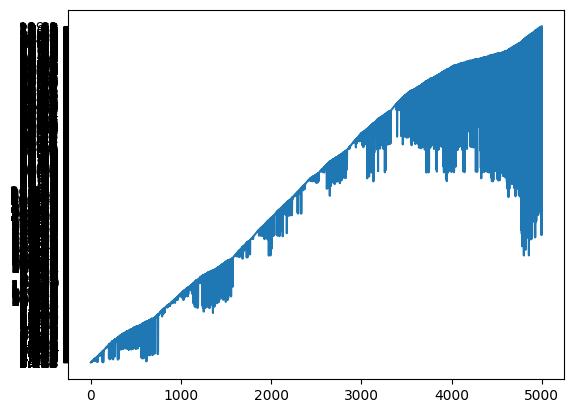

In [1]:
import torch, pywt, csv, numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import reader1 as rd
import utilerias as utls
from NARNN import NARNN 

# Abrir el archivo CSV en modo lectura
#Grupo Financiero Inbursa
cierre = rd.leer_archivo('cierre.csv')

x = np.arange(1, 5000)

# Crear un gráfico de línea con los valores de x, y
plt.plot(x, cierre)

# Mostrar el gráfico
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '.../distribuciones/ACTINVRB/DWT_NARNN.npy'

In [9]:
import numpy as np

def mse_elemental(lista1, lista2):
  """
  Calcula el error cuadrático medio (MSE) elemento a elemento entre dos listas.

  Args:
    lista1: Primera lista de valores.
    lista2: Segunda lista de valores.

  Returns:
    Un arreglo numpy con los errores cuadráticos medios elemento a elemento.
  """

  if len(lista1) != len(lista2):
    raise ValueError("Las listas deben tener la misma longitud")

  # Convertir las listas a arreglos de NumPy
  arr1 = np.array(lista1)
  arr2 = np.array(lista2)

  # Calcular las diferencias al cuadrado
  diferencias_cuadradas = (arr1 - arr2)**2

  return diferencias_cuadradas

# Ejemplo de uso
lista_real = [1, 2, 3, 4]
lista_predicha = [1.2, 1.9, 3.1, 4.5]

mse_por_elemento = mse_elemental(lista_real, lista_predicha)
print(mse_por_elemento)

[0.04 0.01 0.01 0.25]


In [ ]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF([3, 3, 1, 4])

ecdf([3, 55, 0.5, 1.5])

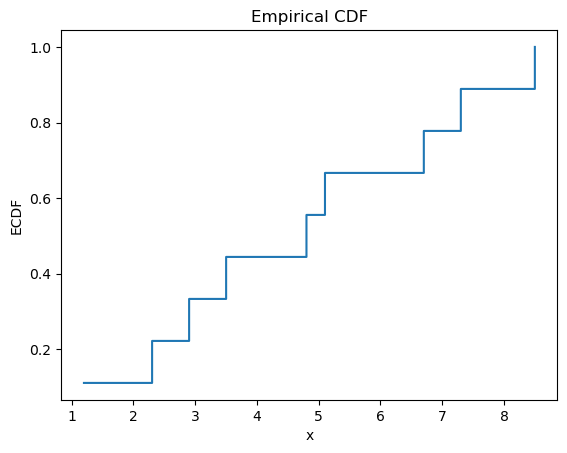

In [13]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ejemplo de conjunto de datos
data = np.array([1.2, 2.3, 2.9, 3.5, 4.8, 5.1, 6.7, 7.3, 8.5])

# Calcular la ECDF
ecdf = sm.distributions.ECDF(data)

# Valores para la gráfica
x = np.linspace(min(data), max(data), num=1000)
y = ecdf(x)

# Graficar la ECDF
plt.step(x, y, where='post')
plt.xlabel('x')
plt.ylabel('ECDF')
plt.title('Empirical CDF')
plt.show()


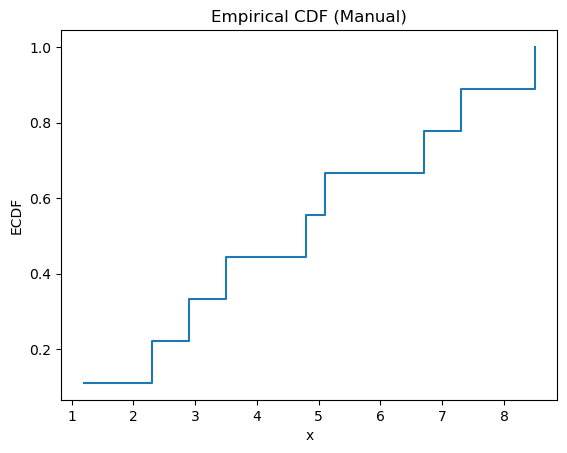

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de conjunto de datos
data = np.array([1.2, 2.3, 2.9, 3.5, 4.8, 5.1, 6.7, 7.3, 8.5])

# Ordenamos los datos
data_sorted = np.sort(data)

# Calcular el porcentaje acumulado para cada valor
n = len(data)
y = np.arange(1, n+1) / n

# Graficar la ECDF
plt.step(data_sorted, y, where='post')
plt.xlabel('x')
plt.ylabel('ECDF')
plt.title('Empirical CDF (Manual)')
plt.show()


KstestResult(statistic=0.4636363636363636, pvalue=1.0412093411037806e-10, statistic_location=-0.026281485752711293, statistic_sign=-1)

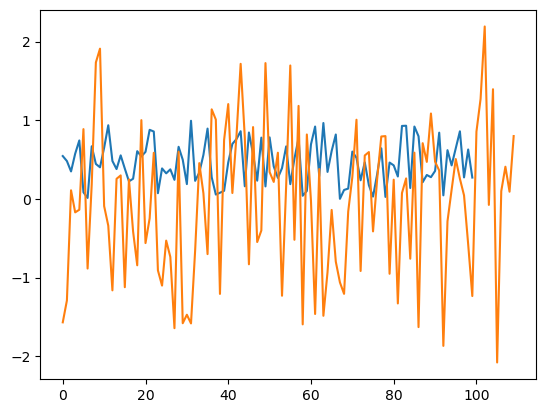

In [8]:
import numpy as np
from scipy import stats

rng = np.random.default_rng()
sample1 = stats.uniform.rvs(size=100, random_state=rng)
plt.plot(sample1)
sample2 = stats.norm.rvs(size=110, random_state=rng)
plt.plot(sample2)
stats.ks_2samp(sample1, sample2)
# KstestResult(statistic=0.5454545454545454,
#              pvalue=7.37417839555191e-15,
#              statistic_location=-0.014071496412861274,
#              statistic_sign=-1)

KstestResult(statistic=0.5545454545454546, pvalue=2.2652931717146334e-15, statistic_location=0.04571113571505482, statistic_sign=-1)

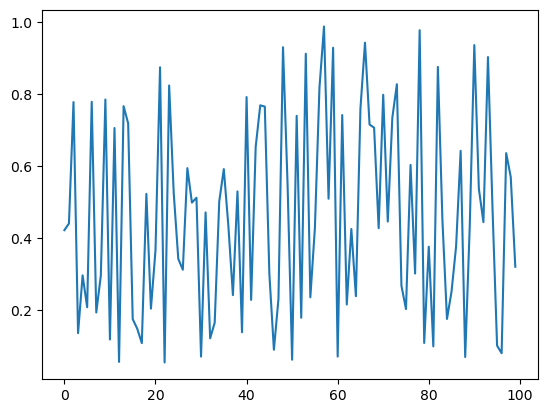

In [6]:
import numpy as np
from scipy.stats import norm

# Supongamos que 'errores' es una lista con los errores de predicción
errores = np.array([-0.2, 0.5, -0.1, 0.3, -0.4])

# Ordenar los errores
errores_ordenados = np.sort(errores)

# Calcular la FDA
n = len(errores)
print(np.arange(1, n+1)/n)
fda = np.arange(1, n+1) #/ n

# Graficar la FDA
import matplotlib.pyplot as plt
plt.plot(errores_ordenados, fda)
plt.xlabel('Errores de predicción')
plt.ylabel('FDA')
plt.title('Función de Distribución Acumulada de los Errores')
plt.show()

In [ ]:
def entrena_LM_pred(red,n_red,inputs,epocas,lr,λ,batch_size = 1,decay_factor=0.5,t_ent = 8,t_sal = -1,e_predictivo = false):
    """
    Entrena una red con el método de Levenverg-Marquardt 
    a partir de un conjunto de entradas y una salida
    Va actualizando los parametros de entrenamiento con los datos que va prediciendo

    Args:
        red: instancia de la red a entrenar
        n_red:
        inputs: entradas de la red
        epocas: número de iteraciones del algoritmo
        lr: taza de aprendizaje que se aplicara como ponderación de la actualización de los parametros de la red
        λ: ponderación inicial de la matriz hessiana 
        batch_size: tamaño del batch para el entrenamiento
        decay_factor: ponderación del decaimiento de la taza de aprendizaje
        t_ent: tamaño de la entrada a la red neuronal
        t_sal: tamaño de la salida de la red neuronal
    """
    print("---INICIO DE ENTRENAMIENTO: entrena_LM_pred---")
    #print("paramtros antes: " + str([i for i in red.parameters()][0]))
    lr_callback = CustomLearningRateScheduler(lr,decay_factor)
    ventana_en_epoca = 1
    lote_designado = 1
    for epoca in range(epocas): #numero de apocas que se requiere que la red entrene
        s_original = [] #serie original
        s_pred = [] #serie a partir de predicciones
        ventana = 1
        n_lote = 1
        print(f"---Inicio de epoca: {epoca+1}--")
        #se trata de la serie aue va prediciendo la red conforme se modifican los parametros de esta
        serie = inputs[n_red][0][:t_ent]#primeros 8 elementos de la red (inputs[numero de la red][primer batch][primeros t_ent elementos])
        for i in range(0,len(inputs[n_red]),batch_size):#por cada uno de los elementos del primer c. entrenamiento (el primero de los 6)(por cada uno son 12 iteraciones)
            
            # print("INICIO DE EPOCA...")
            # print(">>Ventana Actual: " + str(ventana))

            lote = inputs[n_red][i:i+batch_size]
            
            entradas_por_lote = []
            salidas_por_lote = []
            for ejemplar in lote:
                #entradas = i[:, :t_ent]#se parten los primeros 8 días y se obtiene el noveno
                entradas = serie[ventana-1:ventana+t_ent-1]
                #print(f">>Entradas: {entradas}")
                #se agregan las entradas del ejemplar a las de todo el lote
                entradas_por_lote.append(entradas)
                salida = ejemplar[t_sal].view(1)
                print(">>Salida: " + str(salida))
                s_original.append(salida.item())
                salidas_por_lote.append(salida)
                
                pred = red(entradas) #prediccion despues de haber modificado los pesos
                print(f"prediccion pre entreno: {pred}")
                serie = torch.cat((serie,pred))# Se precidce el resultado con la red despues del paso y se integra a la serie
                s_pred.append(pred.item())

                ventana = ventana + 1
            #Core/Nucleo del algoritmo
            # print(f"entradas_por_lote: {entradas_por_lote}")
            # print(f"salidas_por_lote: {salidas_por_lote}")
                
            # Vamos a evaluar el comportamiento del lr hasta ahora
            print(f"A comparar perdida actual: {torch.tensor(s_original[len(s_original)-t_ent:])} ,  {torch.tensor(s_pred[len(s_pred)-t_ent:])}")
            perdida_actual = criterion(torch.tensor(s_original[len(s_original)-t_ent:]),torch.tensor(s_pred[len(s_pred)-t_ent:]))
            print(f"Perdida actual: {perdida_actual}")
            if(criterion(torch.tensor(s_original[len(s_original)-t_ent:]),torch.tensor(s_pred[len(s_pred)-t_ent:])) <= 0.005 and lote_designado == n_lote):
                print(f">>nuevo factor: {lr_callback.decay_factor*0.8}")
                lr_callback.decay_factor = lr_callback.decay_factor*0.8
                lote_designado = lote_designado + 1
            lm = LM(red,entradas_por_lote,salidas_por_lote,lr=lr,λ = λ) #se modifica cada parametro de la red segun el batch que se le de (Entrada y salida predecida contra salida esperada)
            metricas = lm.exec(sub_epocas = 1)
            if(batch_size == 1):
                print(f"prediccion post entreno: {red(entradas)}")
            """for e in entradas_por_lote:
                pred = red(e) #prediccion despues de haber modificado los pesos
                serie = torch.cat((serie,pred))# Se precidce el resultado con la red despues del paso y se integra a la serie
                s_pred.append(pred.item())"""
            
            lr = lr_callback.on_batch_begin(n_lote, logs={'loss': 0, 'epoca': epoca+1})
            
            # writer.add_scalar(f'Gradiente de {n_red}', metricas['grad'].norm(), ventana_en_epoca)
            # writer.add_scalar(f'Matriz Hessiana de {n_red}', metricas['hessian'].norm(), ventana_en_epoca)
            #print(perdidas)
            #print("paramtros red despues: " + str([i for i in red.parameters()][0]))
            
            # for clave, loss in perdidas.items():
            #     perdidas_totales.append(loss)
            ventana_en_epoca = ventana_en_epoca + 1
            n_lote = n_lote+1
            
        #print("paramtros despues: " + str([i for i in red.parameters()][0]))

        # for loss in perdidas_totales:
        #     writer.add_scalar('Perdida', loss, clave)
        #     clave = clave +1
        # print("s_original: " + str(s_original) + "tamaño: " + str(len(s_original)))
        # print("s_pred: " + str(s_pred) + "tamaño: " + str(len(s_pred)))
        perdida = criterion(torch.tensor(s_original),torch.tensor(s_pred))
        # print(">>s_original: " + str(s_original))
        # print(">>s_pred: " + str(s_pred))
        print("<<Perdida: "+str(perdida.item()) + f" epoca: {epoca+1}")
        writer.add_scalar(f'Perdida de entrenamiento predictivo de la red: {n_red}', float(perdida.item()), epoca+1)
        #writer.add_histogram(f'Serie de tiempo predicha para la epoca: {epoca+1}',torch.tensor(s_pred),epoca+1)

        
        
        pinta_pesos(red,epoca)

        plot_buf = utls.gen_plot(s_original,s_pred,perdida.item())
        # for i, valor in enumerate(s_pred):
        #     writer.add_scalar(f'Serie de tiempo predicha para la epoca: {epoca+1}', valor, epoca+1)

        image = PIL.Image.open(plot_buf)
        image = ToTensor()(image).unsqueeze(0)
        writer.add_image(f'Comportamiento de la serie de tiempo para la red: {0} durante el entrenamiento predictivo', image, epoca+1,dataformats='NCHW')

        if (perdida.item() <= tolerancia):
            print(f"---epoca final: {epoca+1}--")
            break
        #epoca = epoca + 1
        lr = lr_callback.reset()
    #writer.add_figure(f'Pérdida de entrenamiento de {n_red}', plt.gcf())
   
    print("---FIN DE ENTRENAMIENTO: entrena_LM_pred---")

In [2]:
def take(rec, take=0):
    rec_len = len(rec)
    if take > 0 and take < rec_len:
        left_bound = right_bound = (rec_len-take) // 2
        if (rec_len-take) % 2:
            # right_bound must never be zero for indexing to work
            right_bound = right_bound + 1

        return rec[left_bound:-right_bound] 
    
import pywt
data = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
(cA3, cD3, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'smooth', level = 3)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
print(len(pywt.upcoef('a', cA3, 'bior3.5' , level = 3)))
print(len(pywt.upcoef('d', cD3, 'bior3.5' , level = 3)))
print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD1, 'bior3.5')))

A2 = pywt.upcoef('a', cA3, 'bior3.5' , level = 3, take = 34) + pywt.upcoef('d', cD3, 'bior3.5' , level = 3, take=34)
A1 = take(A2, take = 24) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 24)
print(A1)
print(pywt.upcoef('d', cD1, 'bior3.5', take = 20))
final = take(A1, take = 20) + pywt.upcoef('d', cD1, 'bior3.5', take = 20)
print(final)

166
166
82
40
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25.]
[-7.35980840e-17 -8.95443355e-17  6.35550121e-17  2.28690713e-16
 -2.34133905e-16 -6.88448744e-17  5.88018025e-17  1.48806126e-16
 -1.78475354e-16  3.33031330e-16 -2.10367857e-16 -5.52598947e-16
  4.99240336e-16  4.33002061e-16 -5.17026540e-16  1.61302467e-16
  9.07709703e-17 -7.28621032e-16  8.43924697e-16 -2.15887713e-16]
[ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21.
 22. 23.]


C:\Users\maliera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [3]:
data = list(range(1,79)) #data = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
(cA1, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 1)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
print(len(pywt.upcoef('a', cA1, 'bior3.5')))
print(len(pywt.upcoef('d', cD1, 'bior3.5')))

print(pywt.upcoef('a', cA1, 'bior3.5', take = 78))
print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
final = pywt.upcoef('a', cA1, 'bior3.5', take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
print(final)

98
98
[ 1.17089844  2.01269531  2.95263672  3.99072266  5.00732422  6.00244141
  7.          8.          9.         10.         11.         12.
 13.         14.         15.         16.         17.         18.
 19.         20.         21.         22.         23.         24.
 25.         26.         27.         28.         29.         30.
 31.         32.         33.         34.         35.         36.
 37.         38.         39.         40.         41.         42.
 43.         44.         45.         46.         47.         48.
 49.         50.         51.         52.         53.         54.
 55.         56.         57.         58.         59.         60.
 61.         62.         63.         64.         65.         66.
 67.         68.         69.         70.         71.         72.
 72.99755859 73.99267578 75.00927734 76.04736328 76.98730469 77.82910156]
[-1.70898438e-01 -1.26953125e-02  4.73632813e-02  9.27734375e-03
 -7.32421875e-03 -2.44140625e-03  5.88018025e-17  1.48806126e-16
 -

138
138
98


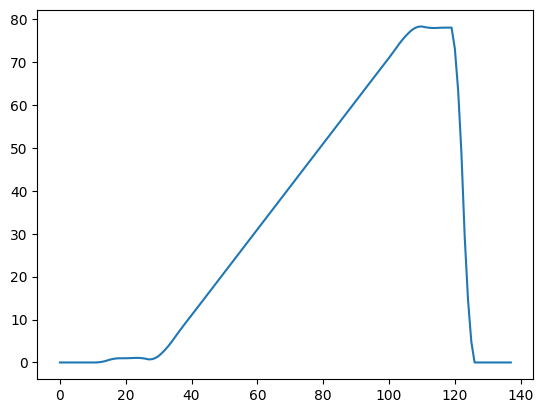

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78.]


In [17]:
import random
data = list(range(1,79)) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
#data = [random.uniform(1, 100) for _ in range(78)]
#rint(data)
(cA2, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 2)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
print(len(pywt.upcoef('a', cA2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD1, 'bior3.5')))

#print(pywt.upcoef('a', cA2, 'bior3.5', take = 98))
#print(pywt.upcoef('d', cD2, 'bior3.5', take = 98))
#print("cD1: " + str(pywt.upcoef('d', cD1, 'bior3.5', take = 78)))
A1 = pywt.upcoef('a', cA2, 'bior3.5', level = 2, take = 98) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
final = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
#print(final)

(cA11, cD11) = pywt.wavedec(pywt.upcoef('a', cA2, 'bior3.5', level = 2), 'bior3.5', 'constant', level=1)
A11 = pywt.upcoef('a', cA11, 'bior3.5', take = 138)# 
D11 = pywt.upcoef('a', cD11, 'bior3.5', take = 138)#



#print(A11)
#print(D11)



A2_ = A11 + D11
# plt.plot(range(len(A11)), A11)
# plt.plot(range(len(D11)), D11)
plt.plot(range(len(A2_)), A2_)
# Mostrar el gráfico
plt.show()
A1 = take(A2_, take = 98) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
final_ = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
print(final_)

In [4]:
import torch

# Supongamos que tienes una lista de tensores
lista_de_tensores = [torch.tensor([1]), torch.tensor([2]), torch.tensor([3]), torch.tensor([4]), torch.tensor([5])]

# Convertir la lista de tensores a un solo tensor
tensor_resultante = torch.cat(lista_de_tensores)

print(lista_de_tensores)
print(tensor_resultante)

[tensor([1]), tensor([2]), tensor([3]), tensor([4]), tensor([5])]
tensor([1, 2, 3, 4, 5])


# nivel 3

222
138
[ 2.4801774   3.67390776  4.86763811  6.06136847  7.13490915  8.08826017
  9.04161119  9.99496222 10.97542858 11.98301029 12.990592   13.99817371
 15.00172496 16.00124574 17.00076652 18.00028729 19.00004172 20.0000298
 21.00001788 22.00000596 23.         24.         25.         26.
 27.         28.         29.         30.         31.         32.
 33.         34.         35.         36.         37.         38.
 39.         40.         41.         42.         43.         44.
 45.         46.         47.         48.         49.         50.
 51.         52.         53.         54.         55.         56.
 57.         58.         59.00000596 60.00001788 61.0000298  62.00004172
 63.00028729 64.00076652 65.00124574 66.00172496 66.99817371 67.990592
 68.98301029 69.97542858 70.99496222 72.04161119 73.08826017 74.13490915
 75.06136847 75.86763811 76.67390776 77.4801774  78.16882706 78.73985672]


C:\Users\maliera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


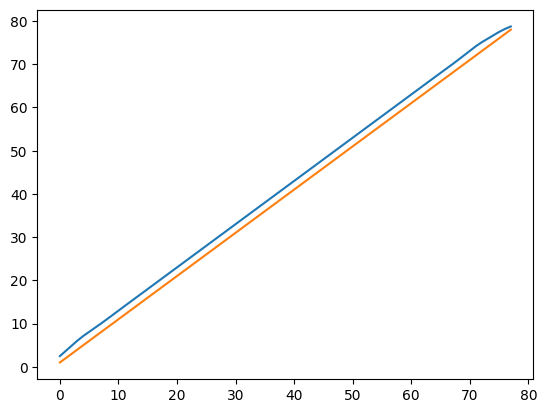

In [13]:
import random
data = list(range(1,79)) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
#data = [random.uniform(1, 100) for _ in range(78)]
#print(data)
(cA3, cD3, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 3)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
#print(pywt.upcoef('a', cA3, 'bior3.5', level = 3))
A3 = pywt.upcoef('a', cA3, 'bior3.5', level = 3, take = 160)
#print(pywt.upcoef('d', cD3, 'bior3.5', level = 3))
D3 = pywt.upcoef('d', cD3, 'bior3.5', level = 3, take = 160)
# print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
# print(len(pywt.upcoef('d', cD1, 'bior3.5')))
print(len(pywt.upcoef('a', cA3, 'bior3.5', level = 3)))
#print(pywt.upcoef('a', cA2, 'bior3.5', take = 98))
#print(pywt.upcoef('d', cD2, 'bior3.5', take = 98))
#print("cD1: " + str(pywt.upcoef('d', cD1, 'bior3.5', take = 78)))
A2 = pywt.upcoef('a', cA3, 'bior3.5', level = 3) + pywt.upcoef('d', cD3, 'bior3.5', level = 3)
# plt.plot(range(len(A11)), A11)
# plt.plot(range(len(D11)), D11)
# plt.plot(range(len(A2)), A2)
# plt.plot(range(len(A2_)), A2_)
# print(A2)
# print(A2_)
# Mostrar el gráfico
# plt.show()
#print(A2)
print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
A1 = take(A2, take = 138) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 138)
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
#print(pywt.upcoef('a', cA3, 'bior3.5', level = 3))
#print(pywt.upcoef('d', cD3, 'bior3.5', level = 3))
final = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
print(final)
plt.plot(range(len(final)), final)
plt.plot(range(len(data)), data)
# plt.plot(range(len(A11)), A11)
# plt.plot(range(len(A3)), A3)

plt.show()

# plt.plot(range(len(D11)), D11)
# plt.plot(range(len(D3)), D3)
# plt.show()
#print(final)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
138
138
98
98
118
138
158


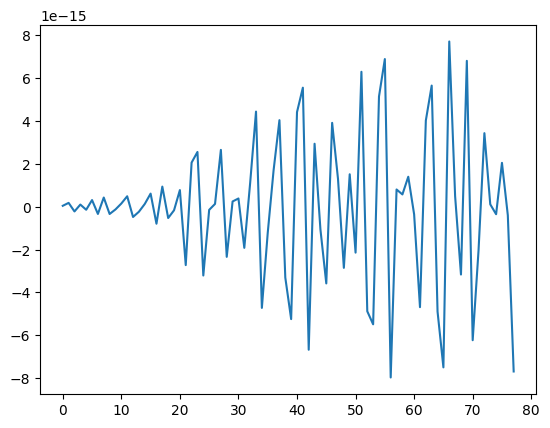

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78.]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]


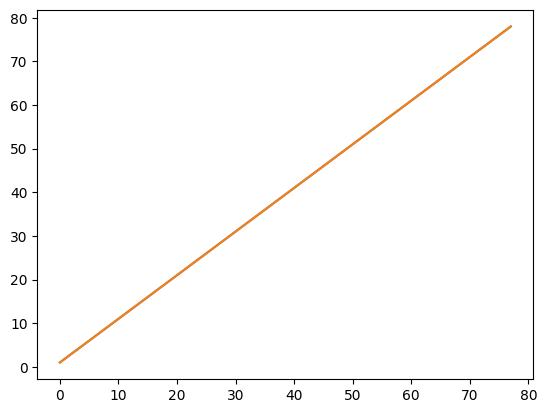

In [19]:
import torch, pywt, csv, numpy as np
import reader1 as rd
import matplotlib.pyplot as plt

def take(rec, take=0):
    rec_len = len(rec)
    if take > 0 and take < rec_len:
        left_bound = right_bound = (rec_len-take) // 2
        if (rec_len-take) % 2:
            # right_bound must never be zero for indexing to work
            right_bound = right_bound + 1

        return rec[left_bound:-right_bound] 

DATOS = 'Datos históricos COMI 3ene16-31dic2020 semanal.csv' 
cierre = rd.leer_archivo(DATOS)
cierre = cierre.astype(float)
cierre_p = cierre[int(len(cierre) * 0.7):]
data = list(range(1,79)) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
data = cierre_p
print(data)
#data = [random.uniform(1, 100) for _ in range(78)]
#rint(data)
(cA2, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 2)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
print(len(pywt.upcoef('a', cA2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD1, 'bior3.5')))

#print(pywt.upcoef('a', cA2, 'bior3.5', take = 98))
#print(pywt.upcoef('d', cD2, 'bior3.5', take = 98))
#print("cD1: " + str(pywt.upcoef('d', cD1, 'bior3.5', take = 78)))
#A1 = pywt.upcoef('a', cA2, 'bior3.5', level = 2, take = 98) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
#final = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
#print(final)
D1 = pywt.upcoef('d', cD1, 'bior3.5', take = 78)
D2 = pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
A2 = pywt.upcoef('a', cA2, 'bior3.5', level = 2, take = 98)
print(len(A2))
(cA3, cD3) = pywt.dwt(A2, 'bior3.5', 'constant',)
A3 = pywt.upcoef('a', cA3, 'bior3.5', take = 138)# 
print(len(A3))
D3 = pywt.upcoef('d', cD3, 'bior3.5', take = 138)#
(cA4, cD4) = pywt.dwt(A3, 'bior3.5', 'constant')
A4 = pywt.upcoef('a', cA4, 'bior3.5', take = 158)# 
print(len(A4))
D4 = pywt.upcoef('d', cD4, 'bior3.5', take = 158)#
(cA5, cD5) = pywt.dwt(A4, 'bior3.5', 'constant')
A5 = pywt.upcoef('a', cA5, 'bior3.5', take = 178)# 
print(len(A5))
D5 = pywt.upcoef('d', cD5, 'bior3.5', take = 178)#

# (cA3, cD3, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 3)
# # D1 = pywt.upcoef('d', cD1, 'bior3.5', take = 78)
# # D2 = pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
# A3_ = pywt.upcoef('a', cA3, 'bior3.5', level = 3,take = 138)# 
# D3_ = pywt.upcoef('a', cD3, 'bior3.5', level = 3,take = 138)#
# A4_ = A5 + D5
# A3_ = take(A4_, take = 222) + D4

#print(A11)
#print(D11)

A4_ = A5 + D5
A3_ = take(A4_, take = 138) + D4
A2_ = take(A3_, take = 118) + D3
#plt.plot(range(len(take(A5, take = 78))), take(A5, take = 78))
plt.plot(range(len(take(D5, take = 78))), take(D5, take = 78))
#plt.plot(range(len(D5)), D5)
#plt.plot(range(len(A2_)), A2_)
# Mostrar el gráfico
plt.show()
A1_ = take(A2_, take = 98) + D2
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
final_ = take(A1_, take = 78) + D1
print(final_)
print(data)
plt.plot(range(len(data)), data)
plt.plot(range(len(final_)), final_)
plt.show()

In [24]:
import torch, pywt, csv, numpy as np
import reader1 as rd
import matplotlib.pyplot as plt

def take(rec, take=0):
    rec_len = len(rec)
    if take > 0 and take < rec_len:
        left_bound = right_bound = (rec_len-take) // 2
        if (rec_len-take) % 2:
            # right_bound must never be zero for indexing to work
            right_bound = right_bound + 1

        return rec[left_bound:-right_bound] 

DATOS = 'Datos históricos COMI 3ene16-31dic2020 semanal.csv' 
cierre = rd.leer_archivo(DATOS)
cierre = cierre.astype(float)
cierre_p = cierre[int(len(cierre) * 0.7):]
data = list(range(1,100)) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
#data = cierre_p
print(data)
#data = [random.uniform(1, 100) for _ in range(78)]
#rint(data)
(cA1, cD1) = pywt.dwt(data, 'bior3.5', 'constant')
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
# print(len(pywt.upcoef('a', cA2, 'bior3.5', level = 2)))
# print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
# print(len(pywt.upcoef('d', cD1, 'bior3.5')))

#print(pywt.upcoef('a', cA2, 'bior3.5', take = 98))
#print(pywt.upcoef('d', cD2, 'bior3.5', take = 98))
#print("cD1: " + str(pywt.upcoef('d', cD1, 'bior3.5', take = 78)))
#A1 = pywt.upcoef('a', cA2, 'bior3.5', level = 2, take = 98) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
#final = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
#print(final)
print(len(data))

D1 = pywt.upcoef('d', cD1, 'bior3.5', take = len(data))
A1 = pywt.upcoef('a', cA1, 'bior3.5')
print(len(cA1))
(cA2, cD2) = pywt.dwt(A1, 'bior3.5', 'constant',)
#D2 = pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
A2 = pywt.upcoef('a', cA2, 'bior3.5', level = 2)
print(len(pywt.upcoef('a', cA2, 'bior3.5',)))

(cA3, cD3) = pywt.dwt(A2, 'bior3.5', 'constant',)
A3 = pywt.upcoef('a', cA3, 'bior3.5')# 
print(len(pywt.upcoef('a', cA3, 'bior3.5')))

#D3 = pywt.upcoef('d', cD3, 'bior3.5', take = 138)#
(cA4, cD4) = pywt.dwt(A3, 'bior3.5', 'constant')
A4 = pywt.upcoef('a', cA4, 'bior3.5')# 
print(len(pywt.upcoef('a', cA4, 'bior3.5')))

#D4 = pywt.upcoef('d', cD4, 'bior3.5', take = 158)#
(cA5, cD5) = pywt.dwt(A4, 'bior3.5', 'constant')
A5 = pywt.upcoef('a', cA5, 'bior3.5')# 
print(len(pywt.upcoef('a', cA5, 'bior3.5')))

#D5 = pywt.upcoef('d', cD5, 'bior3.5', take = 178)#

# (cA3, cD3, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 3)
# # D1 = pywt.upcoef('d', cD1, 'bior3.5', take = 78)
# # D2 = pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
# A3_ = pywt.upcoef('a', cA3, 'bior3.5', level = 3,take = 138)# 
# D3_ = pywt.upcoef('a', cD3, 'bior3.5', level = 3,take = 138)#
# A4_ = A5 + D5
# A3_ = take(A4_, take = 222) + D4

#print(A11)
#print(D11)

# A4_ = A5 + D5
# A3_ = take(A4_, take = 158) + D4
# A2_ = take(A3_, take = 138) + D3
# #plt.plot(range(len(take(A5, take = 78))), take(A5, take = 78))
# plt.plot(range(len(take(D5, take = 78))), take(D5, take = 78))
# #plt.plot(range(len(D5)), D5)
# #plt.plot(range(len(A2_)), A2_)
# # Mostrar el gráfico
# plt.show()
# A1_ = take(A2_, take = 98) + D2
# #print(take(A1, take = 78))
# #print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
# final_ = take(A1_, take = 78) + D1
# print(final_)
# print(data)
# plt.plot(range(len(data)), data)
# plt.plot(range(len(final_)), final_)
# plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
99
55
140
310
330
350


[36.51 36.35 35.96 35.84 36.41 37.36 37.62 37.53 39.97 40.57 40.97 40.08
 38.3  39.35 39.83 39.33 39.51 40.38 41.96 41.08 39.6  39.28 39.12 38.8
 40.69 41.35 41.43 41.72 42.14 42.44 42.42 43.33 42.6  42.88 41.16 38.4
 34.94 30.43 31.18 28.57 32.66 30.81 30.42 31.88 31.5  31.96 31.16 32.89
 33.65 33.88 33.24 32.18 33.06 31.38 31.43 31.4  31.93 32.15 33.09 34.23
 33.23 33.72 33.58 33.39 33.23 34.08 33.76 33.2  30.44 31.53 32.31 31.23
 31.25 31.24 31.21 30.42 29.84 29.51]
138
138
98
98
118
138
158
[36.51 36.35 35.96 35.84 36.41 37.36 37.62 37.53 39.97 40.57 40.97 40.08
 38.3  39.35 39.83 39.33 39.51 40.38 41.96 41.08 39.6  39.28 39.12 38.8
 40.69 41.35 41.43 41.72 42.14 42.44 42.42 43.33 42.6  42.88 41.16 38.4
 34.94 30.43 31.18 28.57 32.66 30.81 30.42 31.88 31.5  31.96 31.16 32.89
 33.65 33.88 33.24 32.18 33.06 31.38 31.43 31.4  31.93 32.15 33.09 34.23
 33.23 33.72 33.58 33.39 33.23 34.08 33.76 33.2  30.44 31.53 32.31 31.23
 31.25 31.24 31.21 30.42 29.84 29.51]
[36.51 36.35 35.96 35.84 3

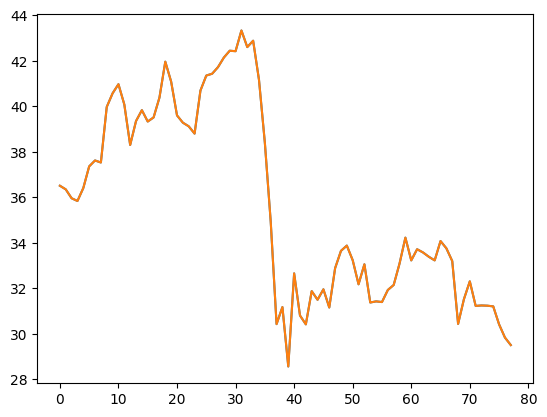

In [65]:
DATOS = 'Datos históricos COMI 3ene16-31dic2020 semanal.csv' 
cierre = rd.leer_archivo(DATOS)
cierre = cierre.astype(float)
cierre_p = cierre[int(len(cierre) * 0.7):]
data = list(range(1,79)) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
data = cierre_p
print(data)
#data = [random.uniform(1, 100) for _ in range(78)]
#rint(data)
(cA2, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 2)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
print(len(pywt.upcoef('a', cA2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD1, 'bior3.5')))

#print(pywt.upcoef('a', cA2, 'bior3.5', take = 98))
#print(pywt.upcoef('d', cD2, 'bior3.5', take = 98))
#print("cD1: " + str(pywt.upcoef('d', cD1, 'bior3.5', take = 78)))
#A1 = pywt.upcoef('a', cA2, 'bior3.5', level = 2, take = 98) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
#final = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
#print(final)
D1 = pywt.upcoef('d', cD1, 'bior3.5', take = 78)
D2 = pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
A2 = pywt.upcoef('a', cA2, 'bior3.5', level = 2, take = 98)
print(len(A2))
(cA3, cD3) = pywt.wavedec(A2, 'bior3.5', 'constant', level=1)
A3 = pywt.upcoef('a', cA3, 'bior3.5', take = 118)# 
print(len(A3))
D3 = pywt.upcoef('d', cD3, 'bior3.5', take = 118)#
(cA4, cD4) = pywt.wavedec(A3, 'bior3.5', 'constant', level=1)
A4 = pywt.upcoef('a', cA4, 'bior3.5', take = 138)# 
print(len(A4))
D4 = pywt.upcoef('d', cD4, 'bior3.5', take = 138)#
(cA5, cD5) = pywt.wavedec(A4, 'bior3.5', 'constant', level=1)
A5 = pywt.upcoef('a', cA5, 'bior3.5', take = 158)# 
print(len(A5))
D5 = pywt.upcoef('d', cD5, 'bior3.5', take = 158)#

# (cA3, cD3, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 3)
# # D1 = pywt.upcoef('d', cD1, 'bior3.5', take = 78)
# # D2 = pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
# A3_ = pywt.upcoef('a', cA3, 'bior3.5', level = 3,take = 138)# 
# D3_ = pywt.upcoef('a', cD3, 'bior3.5', level = 3,take = 138)#
# A4_ = A5 + D5
# A3_ = take(A4_, take = 222) + D4

#print(A11)
#print(D11)

A4_ = A5 + D5
A3_ = take(A4_, take = 138) + D4
A2_ = take(A3_, take = 118) + D3
#plt.plot(range(len(take(A5, take = 78))), take(A5, take = 78))
# plt.plot(range(len(take(D5, take = 78))), take(D5, take = 78))
# #plt.plot(range(len(D5)), D5)
# #plt.plot(range(len(A2_)), A2_)
# # Mostrar el gráfico
# plt.show()
A1_ = take(A2_, take = 98) + D2
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
final_ = take(A1_, take = 78) + D1
print(final_)
print(data)
plt.plot(range(len(data)), data)
plt.plot(range(len(final_)), final_)
plt.show()

[36.51 36.35 35.96 35.84 36.41 37.36 37.62 37.53 39.97 40.57 40.97 40.08
 38.3  39.35 39.83 39.33 39.51 40.38 41.96 41.08 39.6  39.28 39.12 38.8
 40.69 41.35 41.43 41.72 42.14 42.44 42.42 43.33 42.6  42.88 41.16 38.4
 34.94 30.43 31.18 28.57 32.66 30.81 30.42 31.88 31.5  31.96 31.16 32.89
 33.65 33.88 33.24 32.18 33.06 31.38 31.43 31.4  31.93 32.15 33.09 34.23
 33.23 33.72 33.58 33.39 33.23 34.08 33.76 33.2  30.44 31.53 32.31 31.23
 31.25 31.24 31.21 30.42 29.84 29.51]
[36.51 36.35 35.96 35.84 36.41 37.36 37.62 37.53 39.97 40.57 40.97 40.08
 38.3  39.35 39.83 39.33 39.51 40.38 41.96 41.08 39.6  39.28 39.12 38.8
 40.69 41.35 41.43 41.72 42.14 42.44 42.42 43.33 42.6  42.88 41.16 38.4
 34.94 30.43 31.18 28.57 32.66 30.81 30.42 31.88 31.5  31.96 31.16 32.89
 33.65 33.88 33.24 32.18 33.06 31.38 31.43 31.4  31.93 32.15 33.09 34.23
 33.23 33.72 33.58 33.39 33.23 34.08 33.76 33.2  30.44 31.53 32.31 31.23
 31.25 31.24 31.21 30.42 29.84 29.51]


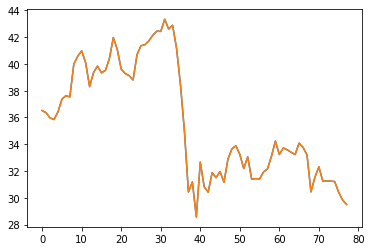

In [3]:
import torch, pywt, csv, numpy as np
import reader1 as rd
import matplotlib.pyplot as plt
from utilerias import take as take
import signal_procesing.multilevel_dwt as m_dwt

DATOS = 'Datos históricos COMI 3ene16-31dic2020 semanal.csv' 
cierre = rd.leer_archivo(DATOS)
cierre = cierre.astype(float)
cierre_p = cierre[int(len(cierre) * 0.7):]
data = cierre_p
#data = list(range(1,79))
wavelet = 'bior3.5'
levels = 5


n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
# print(len(pywt.upcoef('a', cA2, 'bior3.5', level = 2)))
# print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
# print(len(pywt.upcoef('d', cD1, 'bior3.5')))

#print(pywt.upcoef('a', cA2, 'bior3.5', take = 98))
#print(pywt.upcoef('d', cD2, 'bior3.5', take = 98))
#print("cD1: " + str(pywt.upcoef('d', cD1, 'bior3.5', take = 78)))
#A1 = pywt.upcoef('a', cA2, 'bior3.5', level = 2, take = 98) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
#final = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
#print(final)
componentes = []
# At = data
# for l in range(1,levels+1):
#     (cAt, cDt) = pywt.dwt(At, wavelet, 'constant')
#     At = pywt.upcoef('a', cAt, wavelet, take = n)
#     # print(len(pywt.upcoef('a', cA1, 'bior3.5')))
#     Dt = pywt.upcoef('d', cDt, wavelet, take = n)
#     componentes[:0] = [Dt]
#     if (l == levels):
#         componentes[:0] = [At]

componentes = m_dwt.multilevel_dwt(data,wavelet,5,mode='symmetric')

# (cA1, cD1) = pywt.dwt(data, wavelet, 'constant')
# A1 = pywt.upcoef('a', cA1, wavelet, take = n)
# # print(len(pywt.upcoef('a', cA1, 'bior3.5')))
# D1 = pywt.upcoef('d', cD1, wavelet, take = n)

# (cA2, cD2) = pywt.dwt(A1, wavelet, 'constant')
# D2 = pywt.upcoef('d', cD2, wavelet, take = n)
# A2 = pywt.upcoef('a', cA2, wavelet, take = n)
# #print(len(A2))
# # print(len(pywt.upcoef('a', cA2, 'bior3.5')))

# (cA3, cD3) = pywt.dwt(A2, wavelet, 'constant')
# A3 = pywt.upcoef('a', cA3, wavelet, take = n)# 
# #print(len(A3))
# # print(len(pywt.upcoef('a', cA3, 'bior3.5')))
# D3 = pywt.upcoef('d', cD3, wavelet, take = n)#

# (cA4, cD4) = pywt.dwt(A3, wavelet, 'constant')
# A4 = pywt.upcoef('a', cA4, wavelet, take = n)# 
# #print(len(A4))
# # print(len(pywt.upcoef('a', cA4, 'bior3.5')))
# D4 = pywt.upcoef('d', cD4, wavelet, take = n)#

# (cA5, cD5) = pywt.dwt(A4, wavelet, 'constant')
# A5 = pywt.upcoef('a', cA5, wavelet, take = n)# 
# #print(len(A5))
# # print(len(pywt.upcoef('a', cA5, 'bior3.5')))
# D5 = pywt.upcoef('d', cD5, wavelet, take = n)#

# (cA3, cD3, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 3)
# # D1 = pywt.upcoef('d', cD1, 'bior3.5', take = 78)
# # D2 = pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
# A3_ = pywt.upcoef('a', cA3, 'bior3.5', level = 3,take = 138)# 
# D3_ = pywt.upcoef('a', cD3, 'bior3.5', level = 3,take = 138)#
# A4_ = A5 + D5
# A3_ = take(A4_, take = 222) + D4

#print(A11)
#print(D11)
(A5,D5,D4,D3,D2,D1) = componentes
A4_ = A5 + D5
A3_ = A4_ + D4
A2_ = A3_ + D3
#plt.plot(range(len(take(A5, take = 78))), take(A5, take = 78))
# plt.plot(range(len(take(D5, take = 78))), take(D5, take = 78))
# #plt.plot(range(len(D5)), D5)
# #plt.plot(range(len(A2_)), A2_)
# # Mostrar el gráfico
# plt.show()
A1_ = A2_ + D2
#print(take(A1, take = 78))
#print(pywt.upcoef('d', cD1, 'bior3.5', take = 78))
final_ = A5 +D5+D4+D3+D2+D1#A1_ + D1
print(final_)
print(data)
plt.plot(range(len(data)), data)
plt.plot(range(len(final_)), final_)
plt.show()

In [6]:
data = list(range(1,79)) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40]
#data = [random.uniform(1, 100) for _ in range(78)]
#print(data)
(cA5, cD5, cD4, cD3, cD2, cD1) = pywt.wavedec(data, 'bior3.5', 'constant', level = 5)
n = len(data)
#r = pywt.upcoef('a', cA, 'bior3.5' , level = 3) + pywt.upcoef('d', cD, 'bior3.5' , level = 3) + pywt.upcoef('d', cD1, 'bior3.5', level = 2) + pywt.upcoef('d', cD2, 'bior3.5')
print(len(pywt.upcoef('a', cA5, 'bior3.5', level = 5)))
print(len(pywt.upcoef('d', cD5, 'bior3.5', level = 5)))
print(len(pywt.upcoef('d', cD4, 'bior3.5', level = 4)))
print(len(pywt.upcoef('d', cD3, 'bior3.5', level = 3)))
print(len(pywt.upcoef('d', cD2, 'bior3.5', level = 2)))
print(len(pywt.upcoef('d', cD1, 'bior3.5')))

#print(pywt.upcoef('a', cA2, 'bior3.5', take = 98))
#print(pywt.upcoef('d', cD2, 'bior3.5', take = 98))
#print("cD1: " + str(pywt.upcoef('d', cD1, 'bior3.5', take = 78)))
A4 = pywt.upcoef('a', cA5, 'bior3.5', level = 5, take = 390) + pywt.upcoef('d', cD5, 'bior3.5', level = 5, take = 390)
A3 = take(A4, take = 222) + pywt.upcoef('d', cD4, 'bior3.5', level = 4, take = 222)
A2 = take(A3, take = 138) + pywt.upcoef('d', cD3, 'bior3.5', level = 3, take = 138)
A1 = take(A2, take = 98) + pywt.upcoef('d', cD2, 'bior3.5', level = 2, take = 98)
print(take(A1, take = 78))
final = take(A1, take = 78)  + pywt.upcoef('d', cD1, 'bior3.5', take = 78)
print(final)

plt.plot(range(len(data)), data)
plt.plot(range(len(final_)), final_)
plt.show()

726
726
390
222
138
98
[14.23096081 15.57998799 16.86032012 18.07195719 19.14192022 20.0702092
 21.0009396  21.9341114  22.91100759 23.93162817 24.9688578  26.02269647
 27.06421994 28.0934282  29.11435172 30.1269905  31.13410458 32.13569395
 33.13152498 34.12159765 35.11167629 36.10176088 37.09184548 38.08193007
 39.07135762 40.06012813 41.04824159 42.03569801 43.02158944 44.00591587
 44.98867732 45.96987377 46.95101959 47.93211479 48.91315936 49.8941533
 50.87514725 51.85614119 52.83713514 53.81812908 54.81065743 55.81472019
 56.83031736 57.85744894 58.8959192  59.94572816 61.00687581 62.07936215
 63.14880861 64.21521517 65.27858185 66.33890864 67.39923543 68.45956222
 69.51988901 70.5802158  71.57607304 72.50746074 73.37437292 74.1768096
 74.89646023 75.53332481 76.0871697  76.55799489 76.94604954 77.25133367
 77.47787774 77.62568174 77.80060108 78.00263577 78.20467046 78.40670515
 78.53488358 78.58920576 78.71378713 78.90862769 78.96774151 78.89112858]
[14.06006237 15.56729268 16.90

C:\Users\maliera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [7]:
import pywt
import pdb
import numpy as np

def wrcoef(X, coef_type, coeffs, wavename, level):
    N = np.array(X).size#se calcula el tamaño
    a, ds = coeffs[0], list(reversed(coeffs[1:]))

    if coef_type =='a':
        return pywt.upcoef('a', a, wavename, level=level)[:N]
    elif coef_type == 'd':
        return pywt.upcoef('d', ds[level-1], wavename, level=level)[:N]
    else:
        raise ValueError("Invalid coefficient type: {}".format(coef_type))



level = 4
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 203, 14, 15, 16, 17, 18, 19, 20]#[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
n = len(X)
coeffs = pywt.wavedec(X, 'db1', level=level)
N = np.array(X).size
a4 = pywt.upcoef('a', coeffs[0], 'db1' , level = 4)[:N]
d4 = pywt.upcoef('d', coeffs[1], 'db1' , level = 4)[:N] 
d3 = pywt.upcoef('d', coeffs[2], 'db1', level = 3)[:N] 
d2 = pywt.upcoef('d', coeffs[3], 'db1', level = 2)[:N] 
d1= pywt.upcoef('d', coeffs[4], 'db1')[:N]

r = pywt.upcoef('a', coeffs[0], 'db1' , level = 4)[:N] + pywt.upcoef('d', coeffs[1], 'db1' , level = 4)[:N] + pywt.upcoef('d', coeffs[2], 'db1', level = 3)[:N] + pywt.upcoef('d', coeffs[3], 'db1', level = 2)[:N] + pywt.upcoef('d', coeffs[4], 'db1')[:N]

A4 = wrcoef(X, 'a', coeffs, 'db1', level)
D4 = wrcoef(X, 'd', coeffs, 'db1', level)
D3 = wrcoef(X, 'd', coeffs, 'db1', 3)
D2 = wrcoef(X, 'd', coeffs, 'db1', 2)
D1 = wrcoef(X, 'd', coeffs, 'db1', 1)

#print(D1)
#print(d1)
print(r)
print (A4 + D4 + D3 + D2 + D1)
print (a4 + d4 + d3 + d2 + d1)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12. 203.  14.
  15.  16.  17.  18.  19.  20.]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12. 203.  14.
  15.  16.  17.  18.  19.  20.]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12. 203.  14.
  15.  16.  17.  18.  19.  20.]


In [8]:
a = [4,4,3,2,1]
print(list(reversed(a[1:])))

[1, 2, 3, 4]


La magnitud de los coeficientes generados a partir de la DFT se refieren a la parte real de la evaluacion DFT(n) donde n se refiere a cada una de las frecuencias y f[k] es un punto en la serie de tiempo:

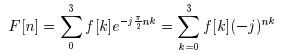

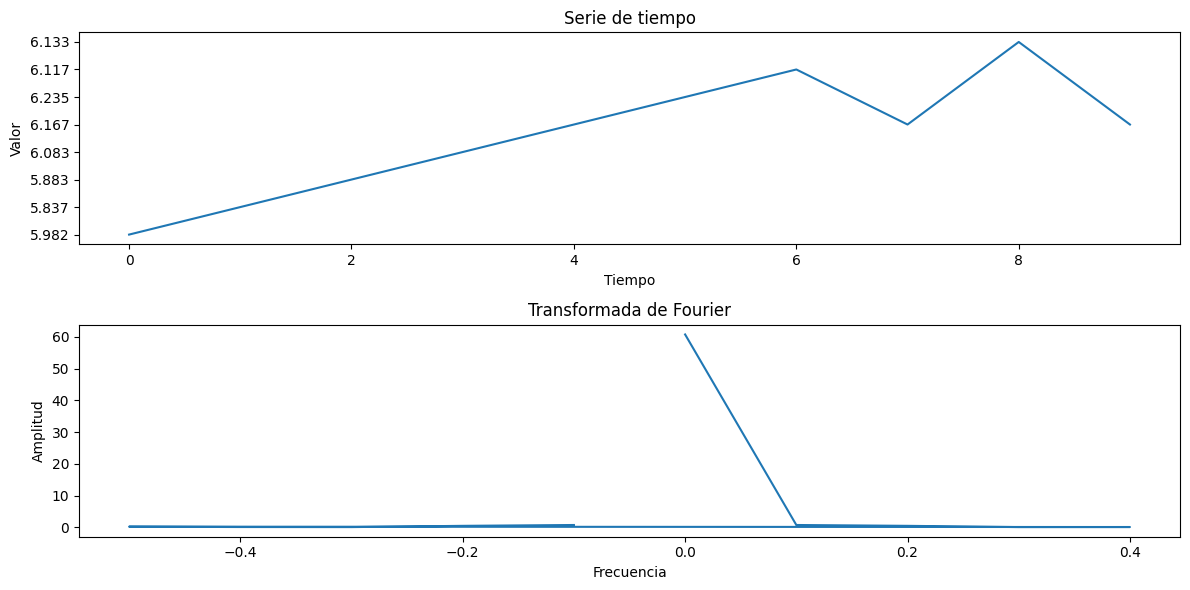

In [9]:
# Calcular la Transformada de Fourier
transformada = np.fft.fft(cierre[:10])

# Calcular las frecuencias correspondientes a los coeficientes de la transformada
frecuencias = np.fft.fftfreq(len(cierre[:10]), d=1)  # Aquí asumimos que los datos están separados por un intervalo de tiempo constante
magnitudes = np.abs(frecuencias)
# Graficar la serie de tiempo y la transformada de Fourier
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(range(len(cierre[:10])), cierre[:10])
plt.title("Serie de tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Valor")

plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(transformada))
plt.title("Transformada de Fourier")
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

C:\Users\maliera\AppData\Local\Temp\ipykernel_22920\3431455161.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((2, 3), (1, 1), colspan=3)
C:\Users\maliera\AppData\Local\Temp\ipykernel_22920\3431455161.py:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((2, 3), (1, 2), colspan=3)
C:\Users\maliera\AppData\Local\Temp\ipykernel_22920\3431455161.py:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((2, 3), (0, 1), colspan=3)
C:\Users\maliera\AppData\Local\Temp\ipykernel_22920\3431455161.py:46: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is 

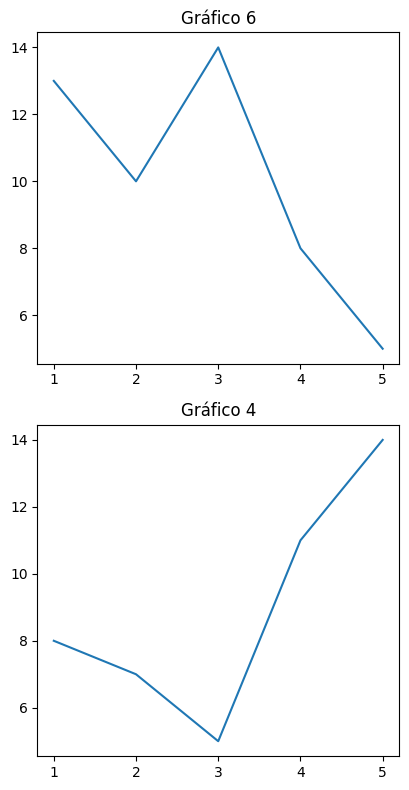

In [10]:
import matplotlib.pyplot as plt

# Datos para los gráficos
x1 = [1, 2, 3, 4, 5]
y1 = [10, 15, 7, 12, 9]

x2 = [1, 2, 3, 4, 5]
y2 = [5, 8, 12, 6, 10]

x3 = [1, 2, 3, 4, 5]
y3 = [9, 12, 6, 10, 8]

x4 = [1, 2, 3, 4, 5]
y4 = [8, 7, 5, 11, 14]

x5 = [1, 2, 3, 4, 5]
y5 = [6, 9, 11, 15, 12]

x6 = [1, 2, 3, 4, 5]
y6 = [13, 10, 14, 8, 5]

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Ajusta el tamaño de las subtramas
plt.subplot2grid((2, 3), (0, 0), colspan=3)
plt.plot(x1, y1)
plt.title('Gráfico 1')

plt.subplot2grid((2, 3), (1, 0), colspan=3)
plt.plot(x2, y2)
plt.title('Gráfico 2')

plt.subplot2grid((2, 3), (1, 1), colspan=3)
plt.plot(x3, y3)
plt.title('Gráfico 3')

plt.subplot2grid((2, 3), (1, 2), colspan=3)
plt.plot(x4, y4)
plt.title('Gráfico 4')

plt.subplot2grid((2, 3), (0, 1), colspan=3)
plt.plot(x5, y5)
plt.title('Gráfico 5')

plt.subplot2grid((2, 3), (0, 2), colspan=3)
plt.plot(x6, y6)
plt.title('Gráfico 6')

# Ajusta el espacio entre las subtramas para evitar superposiciones
plt.tight_layout()

plt.show()


['5.982' '5.837' '5.883' '6.083' '6.167' '6.235' '6.117' '6.167' '6.133'
 '6.167']


C:\Users\maliera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


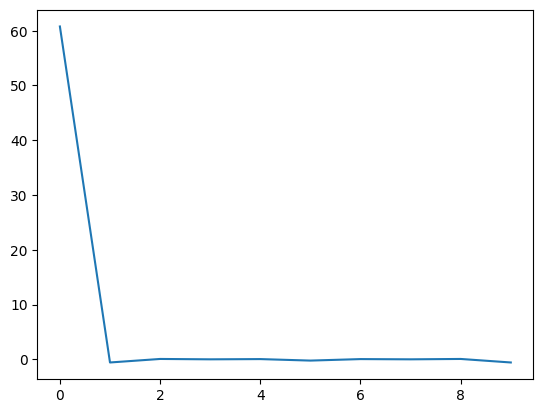

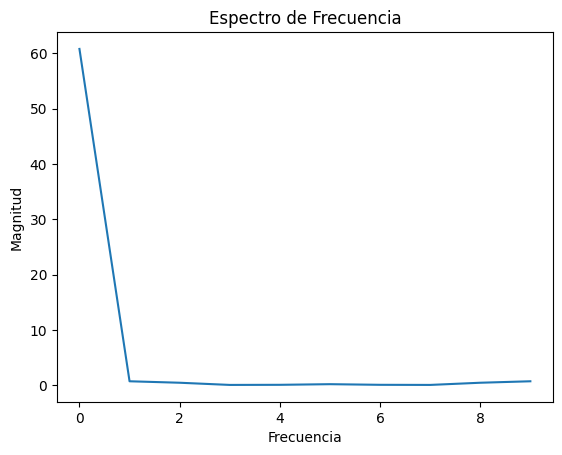

In [11]:
print(cierre[:10])
dft = np.fft.fft(cierre[:10])
# Obtén la magnitud de los coeficientes DFT
magnitud_dft = np.abs(dft)


plt.plot(dft)
plt.show()

#Representa l importancia de cada una de las frecuencias que componen a la serie de tiempo original
# Visualiza el espectro de frecuencia
plt.plot(magnitud_dft)
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.show()
